In [92]:
from numpy.fft import fft,rfft
import numpy as np
from numpy.linalg import inv,pinv

In [13]:
for k in range(2,20):
    good_size = 2**k
    ngood = np.random.normal(0,1,good_size)
    nevil = ngood[:-1]
    print(f"\nPower of 2 is {k}")
    print(f"size={good_size}")
    %timeit fft(ngood)
    print(f"size={good_size-1}")
    %timeit fft(nevil)


Power of 2 is 2
size=4
1.06 µs ± 4.31 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
size=3
1.08 µs ± 3.97 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)

Power of 2 is 3
size=8
1.1 µs ± 4.67 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
size=7
1.1 µs ± 4.74 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)

Power of 2 is 4
size=16
1.14 µs ± 11.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
size=15
1.15 µs ± 6.68 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)

Power of 2 is 5
size=32
1.22 µs ± 2.85 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
size=31
1.81 µs ± 6.39 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)

Power of 2 is 6
size=64
1.34 µs ± 6.81 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
size=63
1.47 µs ± 14.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)

Power of 2 is 7
size=128
1.63 µs ± 1.08 ns per loop (mean ± 

In [71]:
x=2**np.arange(2,20)
xp=x-1

In [94]:
y=np.array( [1.06,1.1,1.14,1.22,1.34,1.63,2.18,3.57,6.27,12.1,25.0,57.1,122,249.,537.,1530.,3450,7590.])
noisey=np.array([4.31,4.67,11.5,2.85,6.81,1.08,9.65,7.66,76.9,36.5,108,120,244,1320,1010,14100,23500,33800])**2
yp=np.array([1.08,1.1,1.15,1.81,1.47,4.99,3.72,13.2,14.4,58.4,42.3,391.,660,1430,4550,10500,7930,54800])

In [73]:
import matplotlib.pyplot as plt

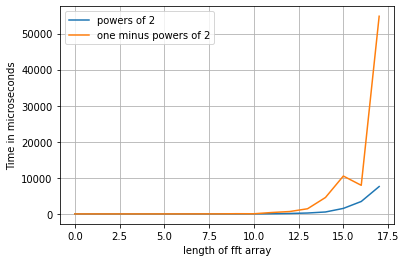

In [74]:
plt.figure()
plt.plot(y,label="powers of 2")
plt.plot(yp,label="one minus powers of 2")
plt.ylabel("Time in microseconds")
plt.xlabel("length of fft array")
plt.legend()
plt.grid()
plt.show()

In [75]:
mersenne_primes=2**np.array([2,3,5,7,13,17,19])-1
times_mersenne_primes = []
for i in mersenne_primes:
#     print(np.where(xp==i)[0][0])
    times_mersenne_primes.append(yp[np.where(xp==i)[0][0]])
len(times_mersenne_primes),len(mersenne_primes)
times_mersenne_primes
# plt.plot(mersenne_primes,times_mersenne_primes)

[1.08, 1.1, 1.81, 4.99, 391.0, 10500.0, 54800.0]

Line of best fit
The model is 
$$f(x)=c+x\cdot log_2(x)*s$$
we do a least squares fit, to find parameters $c$ and $s$. Our data is
```python
d=y # run-times
```
our model is 
```python
m=[c,s]
```
so our matrix for `d=A@m` can be written
```python
A=np.vstack([np.ones(len(d))]).T
```
We have a noise matrix, which is diagonal but not the identity. So to find the optimal m we do
```python
m = inv(A.T@Ninv@A)@A.T@Ninv@d
```

In [106]:
d=y
Ninv=np.diag(1/noisey)
A=np.vstack([np.ones(len(d)),x*np.log2(x)]).T
m = inv(A.T@Ninv@A)@A.T@Ninv@d
m

array([1.14661840e+00, 5.25523073e-04])

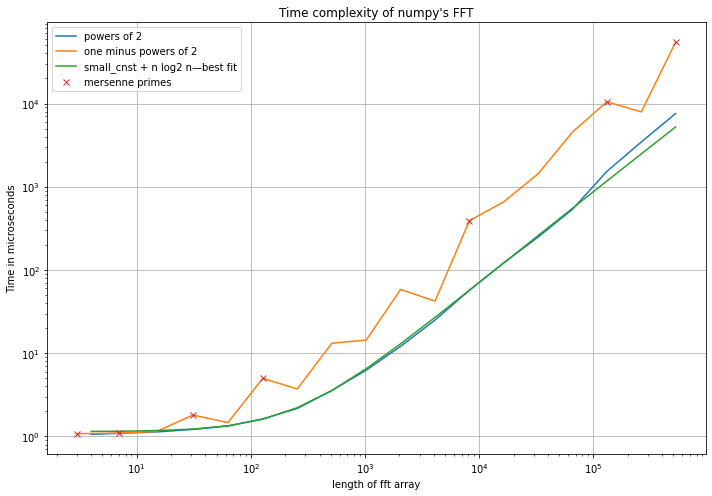

In [104]:
plt.figure(figsize=(10,7))
plt.loglog(x,y,label="powers of 2")
plt.loglog(xp,yp,label="one minus powers of 2")
plt.loglog(x,m[0]+x*np.log2(x)*m[1],label="small_cnst + n log2 n—best fit")
plt.loglog(mersenne_primes,times_mersenne_primes,"x",label="mersenne primes")
plt.ylabel("Time in microseconds")
plt.xlabel("length of fft array")
plt.title("Time complexity of numpy's FFT")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()